# Assignment 3

Interactive plot of data sampled froma normal distribution. The color of the bar is based on the probability that the selected y-axis value is contained within the distribution (e.g. a gradient ranging from blue for the distribution being certainly below this y-axis value, to white if the value is certainly contained, to red if the value is certainly not contained as the distribution is above the axis).

<IPython.core.display.Javascript object>


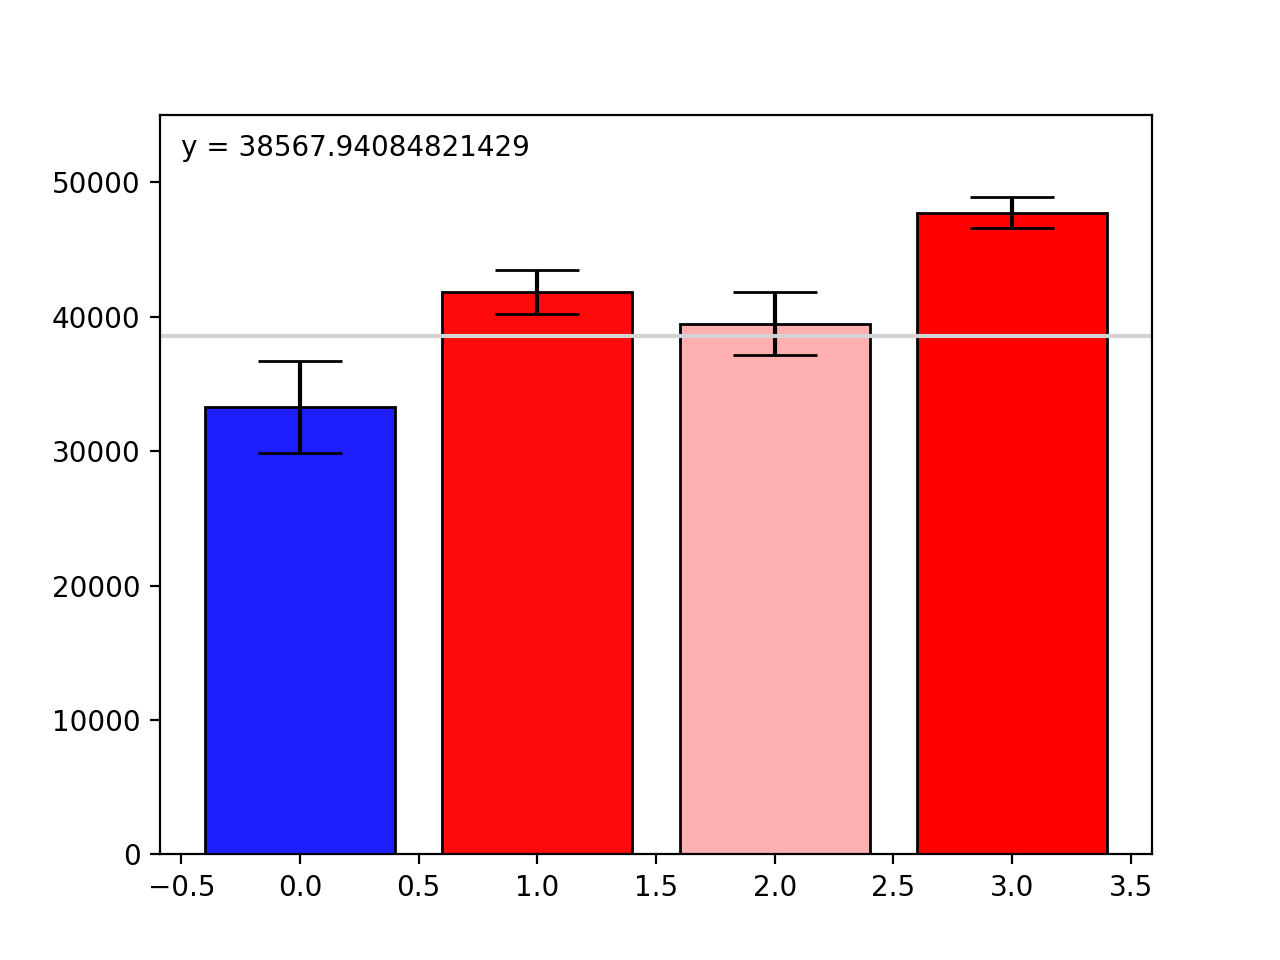

15

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt

%matplotlib notebook

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

#calculate the standard error from the sample
np.random.seed(12345)
df_means = pd.DataFrame({'1992 means':[np.random.normal(32000,200000,3650).mean() for i in range(1000)],
                         '1993 means':[np.random.normal(43000,100000,3650).mean() for i in range(1000)],
                         '1994 means':[np.random.normal(43500,140000,3650).mean() for i in range(1000)],
                         '1995 means':[np.random.normal(48000,70000,3650).mean() for i in range(1000)]})

errs = [df_means.std(axis = 0).iloc[i] for i in range(4)]

#intial y-value
y = 41000

#Probability the distribution is greater than the chosen value
Z = (y-df.apply(np.mean,axis=1))/errs
p = 1-st.norm.cdf(Z)


xvals = [1992,1993,1994,1995]
pos = np.arange(len(xvals))

#calculate means for sample
yvals = [df.T[1992].mean(),df.T[1993].mean(),df.T[1994].mean(),df.T[1995].mean()]

#bwr color gradient
colors = plt.cm.bwr(np.linspace(0, 1, 10000))

plt.bar(pos,yvals, align = 'center', yerr = errs, error_kw = dict(capsize=15), color = colors[np.floor(p*10000).astype(int)-1], edgecolor='black')
plt.xticks(pos, xvals)
plt.gca().set_ylim([0, 55000])

line = plt.axhline(y=y, color='lightgrey', linestyle='-')
plt.gca().annotate('y = {}'.format(y), (-0.5,52000))


plt.show()

#pick new y-value
def onclick(event):
    plt.cla()
    y=event.ydata
    Z = (y-df.apply(np.mean,axis=1))/errs
    p = 1-st.norm.cdf(Z)
    colors = plt.cm.bwr(np.linspace(0, 1, 10000))
    
    plt.gca().set_ylim([0, 55000])
    plt.bar(pos,yvals, align = 'center', yerr = errs, error_kw = dict(capsize=15), color = colors[np.floor(p*10000).astype(int)-1], edgecolor='black')
    plt.axhline(y=event.ydata, color='lightgrey', linestyle='-')
    plt.gca().annotate('y = {}'.format(event.ydata), (-0.5,52000))
    plt.gcf().canvas.mpl_connect('button_press_event', onclick)
    
plt.gcf().canvas.mpl_connect('button_press_event', onclick)